#**Integrantes**

##Lucas de Oliveira Scovini - 563355

##Erick Cunha Costa - 563235

##Enzo Moretto - 563655

---

#**Parte 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Ex 1

In [ ]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## Ex 2

###Global_active_power (kW): potência realmente consumida pela residência. É a energia efetivamente utilizada para realizar trabalho.

###Global_reactive_power (kVAR): potência não utilizada diretamente, mas necessária para manter os campos elétricos e magnéticos. Ela não realiza trabalho, mas circula no sistema.

## Ex 3

In [ ]:
# Cópia da tabela para questão 3
df_q3 = df.copy()

In [ ]:
# Transforma todas as colunas menos a Date e a Time para que não ocorram erros
num_cols_q3 = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']
df_q3[num_cols_q3] = df_q3[num_cols_q3].apply(pd.to_numeric, errors='coerce')
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115134 entries, 0 to 115133
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   115134 non-null  object 
 1   Time                   115134 non-null  object 
 2   Global_active_power    115126 non-null  float64
 3   Global_reactive_power  115126 non-null  float64
 4   Voltage                115126 non-null  float64
 5   Global_intensity       115126 non-null  float64
 6   Sub_metering_1         115126 non-null  float64
 7   Sub_metering_2         115126 non-null  float64
 8   Sub_metering_3         115126 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.9+ MB


In [ ]:
# Mostra a quantidade de valores faltantes
df_q3.isnull().sum()

,0
Date,0
Time,0
Global_active_power,8
Global_reactive_power,8
Voltage,8
Global_intensity,8
Sub_metering_1,8
Sub_metering_2,8
Sub_metering_3,8


181.853 valores faltatantes ao todo

## Ex 4

In [ ]:
# Cópia da tabela para questão 4
df_q4 = df.copy()

In [ ]:
# Transforma a coluna Date no tipo datetime
df_q4['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115134 entries, 0 to 115133
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   115134 non-null  datetime64[ns]
 1   Time                   115134 non-null  object        
 2   Global_active_power    115134 non-null  object        
 3   Global_reactive_power  115134 non-null  object        
 4   Voltage                115134 non-null  object        
 5   Global_intensity       115134 non-null  object        
 6   Sub_metering_1         115134 non-null  object        
 7   Sub_metering_2         115134 non-null  object        
 8   Sub_metering_3         115126 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.9+ MB


In [ ]:
# Cria uma coluna com os dias da semana
df_q4['Weekday'] = df_q4['Date'].dt.day_name()
df_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115134 entries, 0 to 115133
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   115134 non-null  datetime64[ns]
 1   Time                   115134 non-null  object        
 2   Global_active_power    115134 non-null  object        
 3   Global_reactive_power  115134 non-null  object        
 4   Voltage                115134 non-null  object        
 5   Global_intensity       115134 non-null  object        
 6   Sub_metering_1         115134 non-null  object        
 7   Sub_metering_2         115134 non-null  object        
 8   Sub_metering_3         115126 non-null  float64       
 9   Weekday                115134 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 8.8+ MB


In [ ]:
# Para visualizar a coluna criada
df_q4.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Weekday
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


## Ex 5

In [ ]:
df_q5 = df.copy()

In [ ]:
df_q5['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df_q5['Global_active_power'] = df_q5['Global_active_power'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Filtra o ano
df_q5 = df_q5[df_q5['Date'].dt.year == 2007]

In [ ]:
#Agrupa por dia
df_dias_q5 = df_q5.groupby('Date')

In [ ]:
#Printa a média do consumo de cada dia
print("A média do consumo diário de cada dia é:\n", df_dias_q5['Global_active_power'].mean())

A média do consumo diário de cada dia é:
 Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
                ...   
2007-03-02    0.358117
2007-03-03    0.568835
2007-03-04    1.451875
2007-03-05    1.847453
2007-03-06    0.726313
Name: Global_active_power, Length: 65, dtype: float64


In [ ]:
#Printa a média do consumo diário do ano
print("A média do consumo diário total é: ", df_q5['Global_active_power'].mean())

A média do consumo diário total é:  1.4260580239225205


## Ex 6

In [ ]:
df_q6 = df.copy()

In [ ]:
#Altera o tipo dos dados
df_q6['Datetime'] = pd.to_datetime(df_q6['Date'].astype(str) + ' ' + df_q6['Time'].astype(str), errors='coerce')
df_q6['Global_active_power'] = df_q6['Global_active_power'].apply(pd.to_numeric, errors='coerce')

/tmp/ipython-input-2808957571.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_q6['Datetime'] = pd.to_datetime(df_q6['Date'].astype(str) + ' ' + df_q6['Time'].astype(str), errors='coerce')


In [ ]:
#Filtra o dia
df_dia_q6 = df_q6[df_q6['Datetime'].dt.date.astype(str) == '2007-03-16']

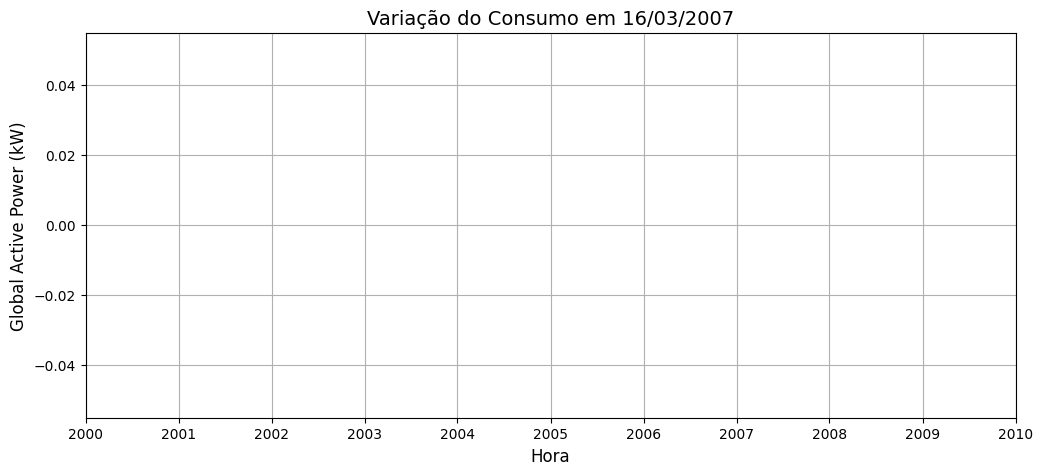

In [ ]:
#Gráfico
plt.figure(figsize=(12,5))
plt.plot(df_dia_q6['Datetime'], df_dia_q6['Global_active_power'], linewidth=1)
plt.title(f'Variação do Consumo em 16/03/2007', fontsize=14)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.grid(True)
plt.show()

## Ex 7

In [ ]:
df_q7 = df.copy()

In [ ]:
#Transforma para numérico
df_q7['Voltage'] = pd.to_numeric(df_q7['Voltage'], errors='coerce')

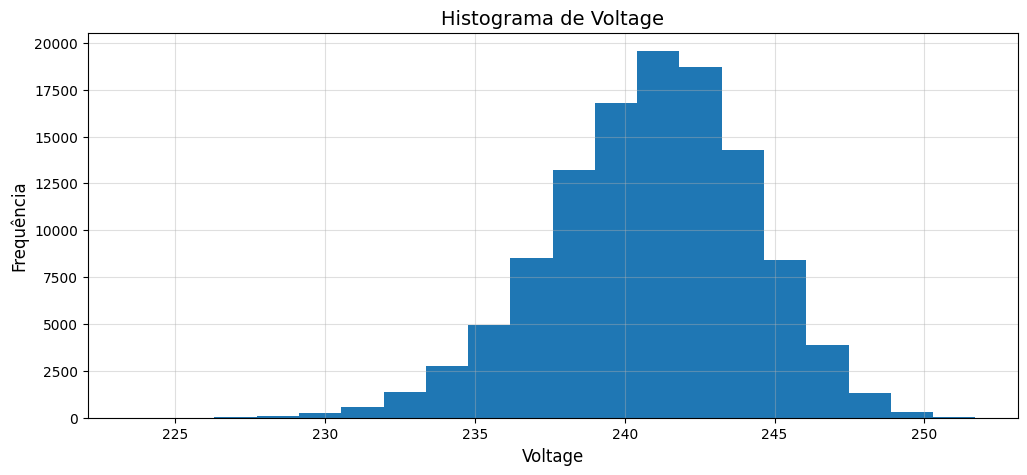

In [ ]:
#Histograma
plt.figure(figsize=(12,5))
plt.hist(df_q7['Voltage'], bins=20)
plt.title('Histograma de Voltage', fontsize=14)
plt.xlabel('Voltage', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0.4)
plt.show()

É possível verificar que a frequência aumenta muito até aproximadamente 242 volts. Após os 242 volts a freqência diminui.

## Ex 8

In [ ]:
df_q8 = df.copy()

In [ ]:
df_q8['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df_q8['Global_active_power'] = df_q8['Global_active_power'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Agrupa por mês
df_mes_q8 = df_q8.groupby(df_q8['Date'].dt.month)

In [ ]:
#Printa a média do consumo de cada mês
print("A média do consumo mensal de cada mês é:\n", df_mes_q8['Global_active_power'].mean())

A média do consumo mensal de cada mês é:
 Date
1     1.546034
2     1.401084
3     0.894319
12    1.901295
Name: Global_active_power, dtype: float64


In [ ]:
#Printa a média do consumo mensal do ano
print("A média do consumo mensal total é: ", df_q8['Global_active_power'].mean())

A média do consumo mensal total é:  1.5168404183242707


## Ex 9

In [ ]:
df_q9 = df.copy()

In [ ]:
df_q9['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df_q9['Global_active_power'] = df_q9['Global_active_power'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Pega o valor total de cada dia
df_valorDias_q9 = df_q9.groupby(df_q9['Date'].dt.date)['Global_active_power'].sum()

In [ ]:
#Pega o maior valor do dia e a data desse valor
dia_q9 = df_valorDias_q9.idxmax()
valor_q9 = df_valorDias_q9.max()

In [ ]:
print("Dia de maior consumo:", dia_q9, "->", valor_q9)

Dia de maior consumo: 2006-12-23 -> 4773.386


## Ex 10

In [ ]:
df_q10 = df.copy()

In [ ]:
df_q10['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df_q10['Global_active_power'] = pd.to_numeric(df_q10['Global_active_power'], errors='coerce')

In [ ]:
#Separa os dias da semana e o final de semana
df_q10['Weekday'] = df_q10['Date'].dt.weekday
df_diasSemana_q10 = df_q10[df_q10['Weekday'] < 5]
df_fimSemana_q10 = df_q10[df_q10['Weekday'] > 4]

In [ ]:
#Pega as médias
media_diaSemana_q10 = df_diasSemana_q10['Global_active_power'].mean()
media_fimSemana_q10 = df_fimSemana_q10['Global_active_power'].mean()

In [ ]:
print("O consumo médio dos dias da semana é: ", media_diaSemana_q10)
print("O consumo médio dos finais de semana é: ", media_fimSemana_q10)
print(f"A diferença entre o consumo médio dos dias de semana e dos finais de semana é: {media_fimSemana_q10 - media_diaSemana_q10}")

O consumo médio dos dias da semana é:  1.3543750336951994
O consumo médio dos finais de semana é:  1.9125031630460732
A diferença entre o consumo médio dos dias de semana e dos finais de semana é: 0.5581281293508737


## Ex 11

In [ ]:
df_q11 = df.copy()

In [ ]:
#Deixa apenas as colunas necessárias
df_q11.drop(['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace=True)

In [ ]:
df_q11 = df_q11.apply(pd.to_numeric, errors='coerce')

In [ ]:
#Calcula a correlação
df_q11.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.273961,-0.610464,0.999024
Global_reactive_power,0.273961,1.000000,-0.161682,0.285756
Voltage,-0.610464,-0.161682,1.000000,-0.616177
Global_intensity,0.999024,0.285756,-0.616177,1.000000


## Ex 12

In [ ]:
df_q12 = df.copy()

In [ ]:
df_q12 = df_q12.apply(pd.to_numeric, errors='coerce')

In [ ]:
#Soma as colunas
df_q12['Total_Sub_metering'] = df_q12['Sub_metering_1'] + df_q12['Sub_metering_2'] + df_q12['Sub_metering_3']

In [ ]:
#Mostra os valores
print(df_q12[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']])

        Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0                  0.0             1.0            17.0                18.0
1                  0.0             1.0            16.0                17.0
2                  0.0             2.0            17.0                19.0
3                  0.0             1.0            17.0                18.0
4                  0.0             1.0            17.0                18.0
...                ...             ...             ...                 ...
115129             0.0             1.0             0.0                 1.0
115130             0.0             1.0             0.0                 1.0
115131             0.0             2.0             0.0                 2.0
115132             0.0             1.0             0.0                 1.0
115133             0.0             2.0             0.0                 2.0

[115134 rows x 4 columns]


## Ex 13

In [ ]:
df_q13 = df.copy()

In [ ]:
df_q13 = df_q13.apply(pd.to_numeric, errors='coerce')
df_q13['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df_q13['Total_Sub_metering'] = df_q13['Sub_metering_1'] + df_q13['Sub_metering_2'] + df_q13['Sub_metering_3']

In [ ]:
#Agrupa por mês de cada ano
df_mes_q13 = df_q13.groupby(df_q13['Date'].dt.to_period('M'))

In [ ]:
#Pega as médias
mediaTotalSubMetering_q13 = df_mes_q13['Total_Sub_metering'].mean()
mediaGlobalActivePower_q13 = df_mes_q13['Global_active_power'].mean()

In [ ]:
#Guarda os meses em que a média de SubMetering é maior
meses_ultrapassa = mediaTotalSubMetering_q13 > mediaGlobalActivePower_q13

In [ ]:
#Mostra os meses em que a média de SubMetering é maior
print(f"Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:\n\n{meses_ultrapassa}")

Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:

Date
2006-12    True
2007-01    True
2007-02    True
2007-03    True
Freq: M, dtype: bool


## Ex 14

In [ ]:
df_q14 = df.copy()

In [ ]:
df_q14['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df_q14['Voltage'] = pd.to_numeric(df_q14['Voltage'], errors='coerce')

In [ ]:
#Filtra o ano
df_q14 = df_q14[df_q14['Date'].dt.year == 2008]

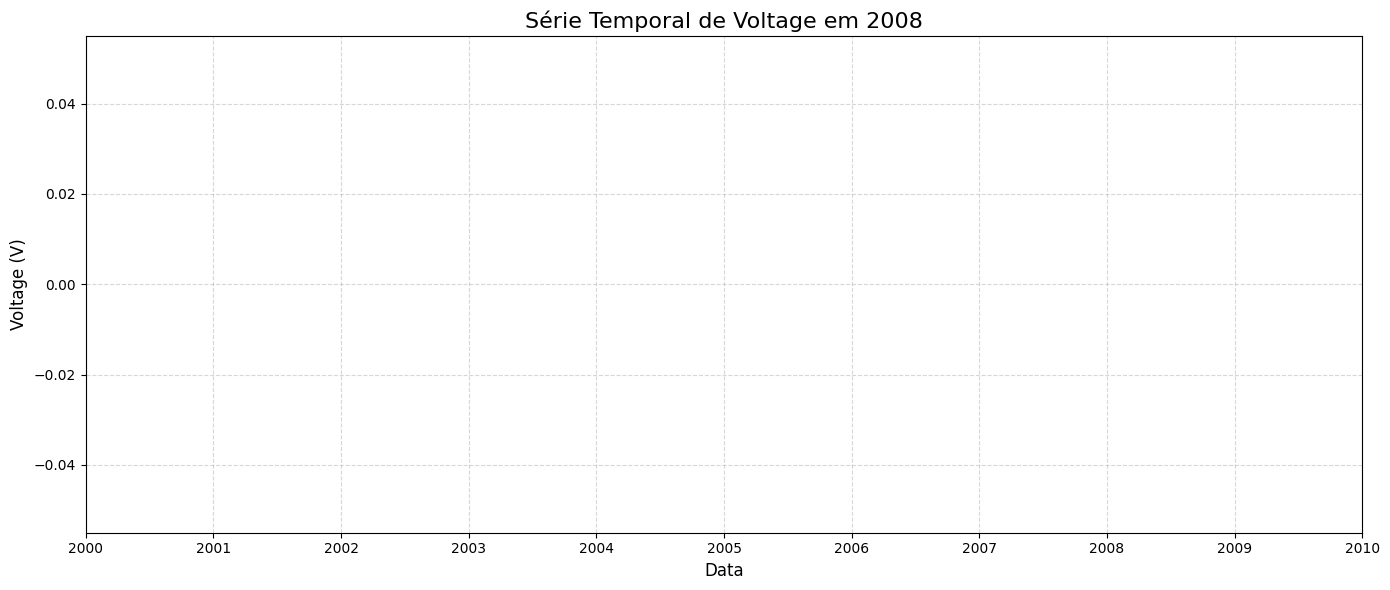

In [ ]:
#Plota o gráfico de Série Temporal
plt.figure(figsize=(14, 6))
plt.plot(df_q14['Date'], df_q14['Voltage'], linewidth=0.7)
plt.title('Série Temporal de Voltage em 2008', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Ex 15

In [ ]:
df_q15 = df.copy()

In [ ]:
df_q15['Date'] = pd.to_datetime(df_q15['Date'], format='%d/%m/%Y', errors='coerce')
df_q15['Global_active_power'] = df_q15['Global_active_power'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Cria uma coluna para os meses
df_q15['Month'] = df_q15['Date'].dt.month

In [ ]:
#Pega os meses do verão e do inverno
verao_q15 = df_q15[df_q15['Month'].isin([6, 7, 8])]
inverno_q15 = df_q15[df_q15['Month'].isin([12, 1, 2])]

In [ ]:
#Pega a média do verão e do inverno
mediaVerao_q15 = verao_q15['Global_active_power'].mean()
mediaInverno_q15 = inverno_q15['Global_active_power'].mean()

In [ ]:
print(f"Consumo médio no verão: {mediaVerao_q15}\nConsumo médio no inverno: {mediaInverno_q15}")

Consumo médio no verão: nan
Consumo médio no inverno: 1.5644428133298425


## Ex 16

In [ ]:
df_q16 = df.copy()

In [ ]:
df_q16['Global_active_power'] = df_q16['Global_active_power'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Pega uma amostra aleatória de 1% do "Global_active_power"
df_1p_q16 = df_q16['Global_active_power'].sample(frac=0.01, random_state=10)

In [ ]:
#Estatísticas do "Global_active_power" completo
df_q16['Global_active_power'].describe()

,Global_active_power
count,115126.000000
mean,1.516840
std,1.344148
min,0.194000
25%,0.332000
50%,1.336000
75%,2.344000
max,10.670000


In [ ]:
#Estatísticas da amostra
df_1p_q16.describe()

,Global_active_power
count,1151.000000
mean,1.459976
std,1.323402
min,0.202000
25%,0.324000
50%,1.312000
75%,2.276000
max,7.818000


Text(0.5, 1.0, 'Amostra 1%')

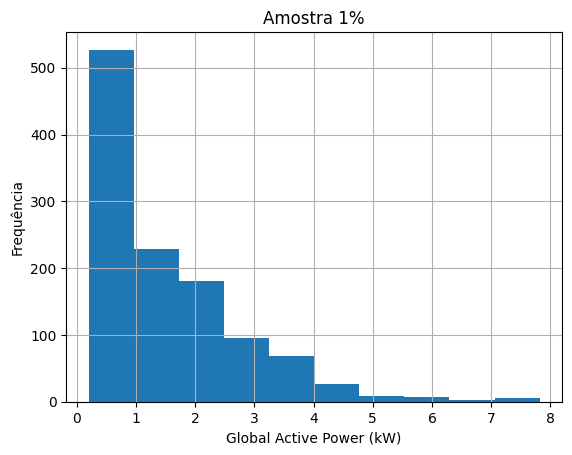

In [ ]:
#Histograma da amostra
df_1p_q16.hist()
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequência")
plt.title("Amostra 1%")

Text(0.5, 1.0, 'Base Completa')

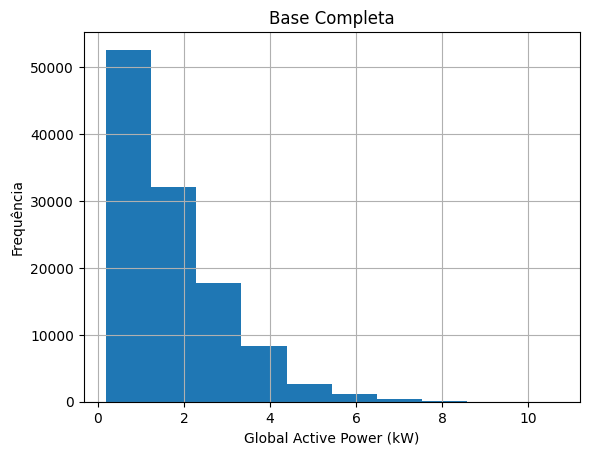

In [ ]:
#Histograma do "Global_active_power" completo
df_q16['Global_active_power'].hist()
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequência")
plt.title("Base Completa")

###Como é possível ver, as estatísticas da amostra são muito semelhantes aos valores completos

## Ex 17

In [ ]:
df_q17 = df.copy()

In [ ]:
#Deixa apenas os valores numéricos na tabela
df_q17.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
df_q17 = df_q17.apply(pd.to_numeric, errors='coerce')

In [ ]:
#Fazendo o Min-Max Scaling
scaler_q17 = MinMaxScaler()
variaveis_normalizadas_q17 = scaler_q17.fit_transform(df_q17)

In [ ]:
#Cria um novo DataFrame do Min-Max Scaling
df_normalizado_q17 = pd.DataFrame(variaveis_normalizadas_q17, columns=df_q17.columns)
df_normalizado_q17.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.383925,0.478261,0.402340,0.385965,0.0,0.012821,0.85
1,0.493127,0.498856,0.359447,0.486842,0.0,0.012821,0.80
2,0.494464,0.569794,0.347395,0.486842,0.0,0.025641,0.85
3,0.495800,0.574371,0.363346,0.486842,0.0,0.012821,0.85
4,0.331424,0.604119,0.432116,0.328947,0.0,0.012821,0.85


## Ex 18

In [ ]:
df_q18 = df.copy()

In [ ]:
# Mantém apenas colunas numéricas
df_num_q18 = df_q18.drop(columns=['Date', 'Time'], errors='ignore')
df_num_q18 = df_num_q18.apply(pd.to_numeric, errors='coerce')
df_num_q18 = df_num_q18.dropna()

In [ ]:
df_num_sample_q18 = df_num_q18.sample(frac=0.01, random_state=42)

In [ ]:
X_q18 = df_num_sample_q18.to_numpy(dtype=float)

In [ ]:
k_q18 = 3
kmeans_q18 = KMeans(n_clusters=k_q18, random_state=42, n_init=10)
labels_q18 = kmeans_q18.fit_predict(X_q18)

# adiciona os rótulos ao dataframe
df_num_sample_q18['cluster'] = labels_q18

In [ ]:
sil_score_q18 = silhouette_score(X_q18, labels_q18)
print(f"Silhouette Score: {sil_score_q18:.4f}")

Silhouette Score: 0.6571


In [ ]:
df_cluster_summary_q18 = df_num_sample_q18.groupby('cluster').mean()
df_cluster_summary_q18

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
cluster,,,,,,,
0,0.784527,0.110441,242.211183,3.364497,0.698225,0.397929,0.022189
1,2.330521,0.133406,239.288174,9.757991,1.248858,0.625571,17.522831
2,4.798378,0.223838,236.574865,20.421622,4.648649,39.783784,14.270270


###Cluster 0 → Dias de baixo consumo

###Cluster 1 → Dias de consumo médio

###Cluster 2 → Dias de alto consumo

## Ex 19

In [ ]:
df_q19 = df.copy()

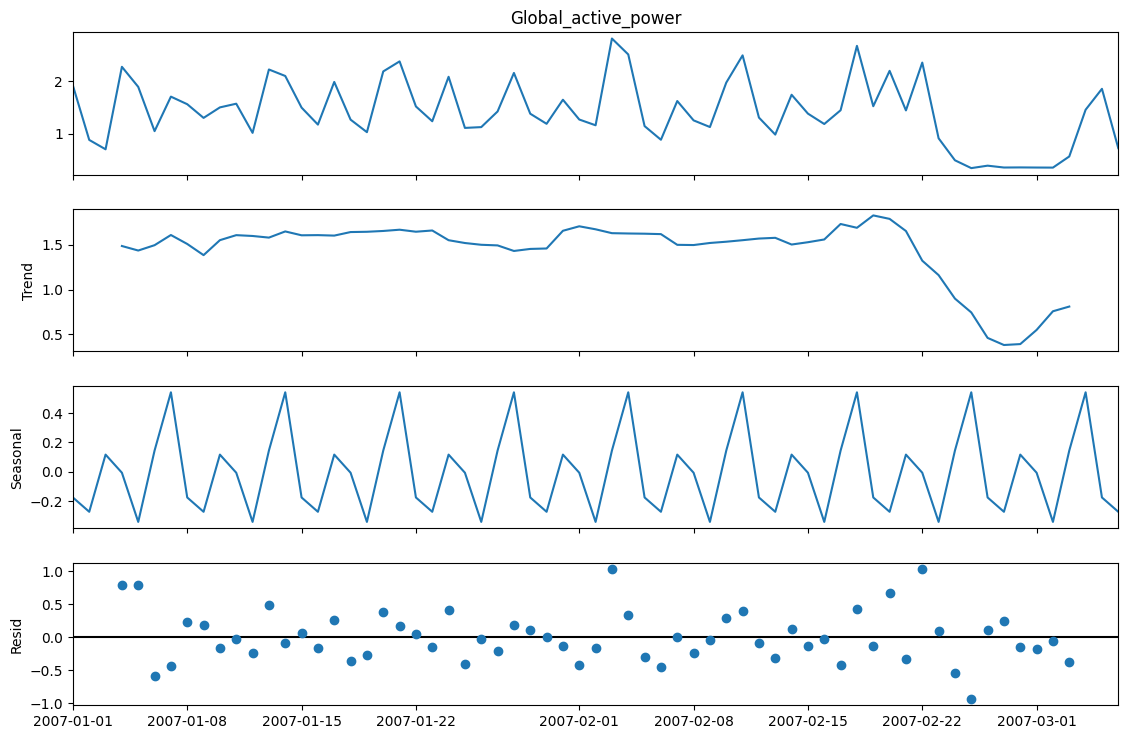

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


df_q19['DateTime'] = pd.to_datetime(df_q19['Date'].astype(str) + ' ' + df_q19['Time'].astype(str), format='%d/%m/%Y %H:%M:%S', errors='coerce')

df_q19['Global_active_power'] = pd.to_numeric(df_q19['Global_active_power'], errors='coerce')

df_q19.set_index('DateTime', inplace=True)

df_q19.dropna(subset=['Global_active_power'], inplace=True)

start_date_q19 = '2007-01-01'
end_date_q19 = '2007-06-30'
df_6months_q19 = df_q19.loc[start_date_q19:end_date_q19]

df_daily_q19 = df_6months_q19['Global_active_power'].resample('D').mean()


decomposition_q19 = seasonal_decompose(df_daily_q19.dropna(), model='additive', period=7)


fig_q19 = decomposition_q19.plot()
fig_q19.set_size_inches(12,8)
plt.show()

## Ex 20

In [ ]:
df_q20 = df.copy()

Coeficiente (slope): 0.2367
Intercepto: -0.0013
Root Mean Squared Error (RMSE): 0.0594


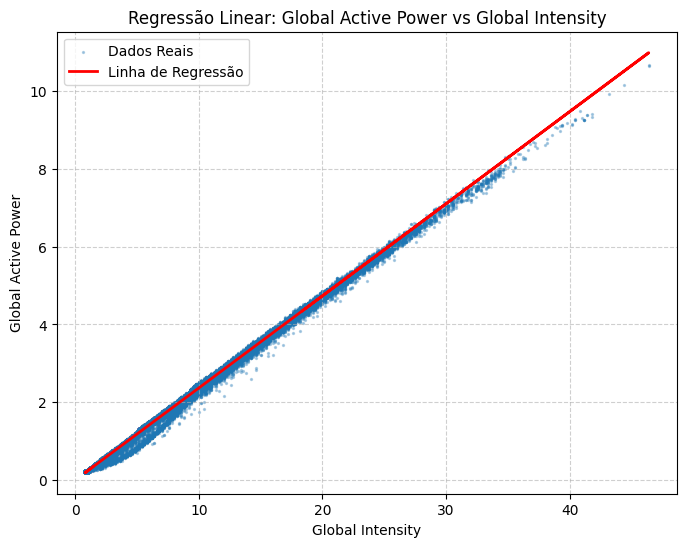

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_reg_simple_q20 = df_q20[['Global_active_power', 'Global_intensity']].copy()


for col in df_reg_simple_q20.columns:
    df_reg_simple_q20[col] = pd.to_numeric(df_reg_simple_q20[col], errors='coerce')

df_reg_simple_q20.dropna(inplace=True)

X_q20 = df_reg_simple_q20[['Global_intensity']]
y_q20 = df_reg_simple_q20['Global_active_power']

model_q20 = LinearRegression()
model_q20.fit(X_q20, y_q20)

y_pred_q20 = model_q20.predict(X_q20)

rmse_q20 = np.sqrt(mean_squared_error(y_q20, y_pred_q20))

print(f"Coeficiente (slope): {model_q20.coef_[0]:.4f}")
print(f"Intercepto: {model_q20.intercept_:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_q20:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_q20, y_q20, s=2, alpha=0.3, label="Dados Reais")
plt.plot(X_q20, y_pred_q20, color='red', linewidth=2, label="Linha de Regressão")
plt.xlabel("Global Intensity")
plt.ylabel("Global Active Power")
plt.title("Regressão Linear: Global Active Power vs Global Intensity")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#**Parte 2**



## Ex 21

In [ ]:
df_q21 = df.copy()

In [ ]:
df_q21['Date'] = pd.to_datetime(df_q21['Date'], format='%d/%m/%Y', errors='coerce')
df_q21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115134 entries, 0 to 115133
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   115134 non-null  datetime64[ns]
 1   Time                   115134 non-null  object        
 2   Global_active_power    115134 non-null  object        
 3   Global_reactive_power  115134 non-null  object        
 4   Voltage                115134 non-null  object        
 5   Global_intensity       115134 non-null  object        
 6   Sub_metering_1         115134 non-null  object        
 7   Sub_metering_2         115134 non-null  object        
 8   Sub_metering_3         115126 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.9+ MB


/tmp/ipython-input-3627497890.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_q21_hourly = df_q21['Global_active_power'].resample('1H').mean()


DateTime
0     1.103420
1     0.956231
2     0.815060
3     0.751804
4     0.751991
5     0.800977
6     1.155332
7     1.911229
8     1.944167
9     1.685586
10    1.523239
11    1.458850
12    1.428505
13    1.352337
14    1.357108
15    1.388531
16    1.469000
17    1.681035
18    2.229424
19    2.590032
20    2.600913
21    2.392415
22    1.721984
23    1.341548
Name: Global_active_power, dtype: float64


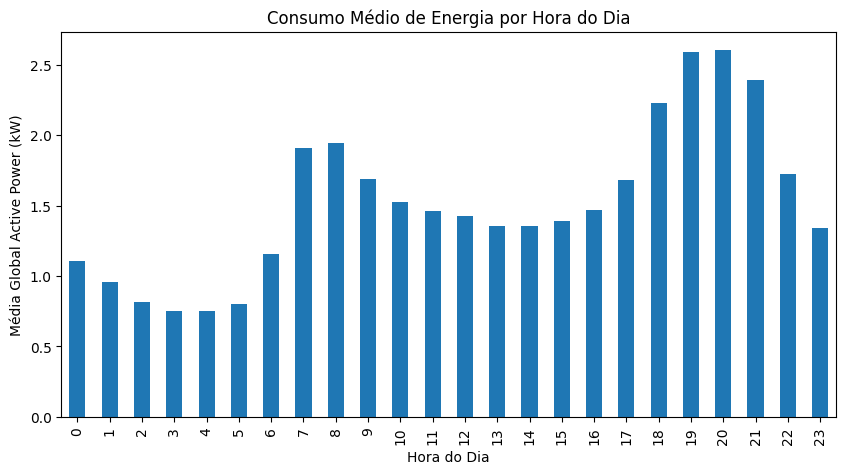

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_q21['DateTime'] = pd.to_datetime(df_q21['Date'].astype(str) + ' ' + df_q21['Time'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')

df_q21.set_index('DateTime', inplace=True)

df_q21['Global_active_power'] = pd.to_numeric(df_q21['Global_active_power'], errors='coerce')
df_q21_hourly = df_q21['Global_active_power'].resample('1H').mean()

hourly_mean_q21 = df_q21_hourly.groupby(df_q21_hourly.index.hour).mean()
print(hourly_mean_q21)

plt.figure(figsize=(10,5))
hourly_mean_q21.plot(kind='bar')
plt.title("Consumo Médio de Energia por Hora do Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Média Global Active Power (kW)")
plt.show()

## Ex 22

In [ ]:
df_q22 = df.copy()

Lag 1h: 0.7759100284576916
Lag 24h: 0.3283402271676639
Lag 48h: 0.2570738992121697


/tmp/ipython-input-1448701035.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series = df_q22['Global_active_power'].resample('1H').mean()


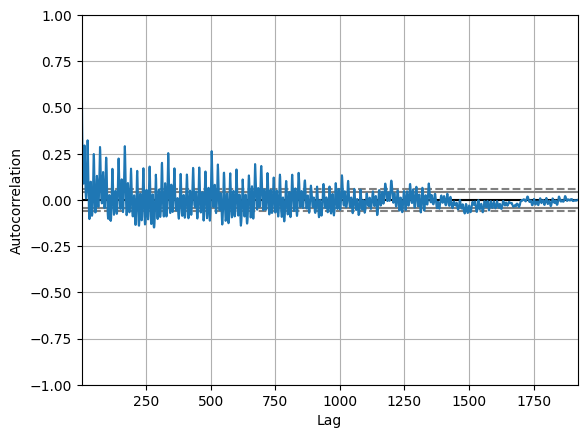

In [ ]:
from pandas.plotting import autocorrelation_plot

df_q22['DateTime'] = pd.to_datetime(df_q22['Date'].astype(str) + ' ' + df_q22['Time'].astype(str), format='%d/%m/%Y %H:%M:%S', errors='coerce')

df_q22['Global_active_power'] = pd.to_numeric(df_q22['Global_active_power'], errors='coerce')

df_q22.set_index('DateTime', inplace=True)


series_q22 = df_q22['Global_active_power'].resample('1H').mean()


print("Lag 1h:", series_q22.autocorr(lag=1))
print("Lag 24h:", series_q22.autocorr(lag=24))
print("Lag 48h:", series_q22.autocorr(lag=48))


autocorrelation_plot(series_q22.dropna())
plt.show()

**Pergunta: existem padões repetidos diariamente?**

Sim, observando o gráfico de autocorrelação, é possível identificar padões repetidos. Isso indica uma forte sazonalidade diária no consumo de energia.

## Ex 23

In [ ]:
df_q23 = df.copy()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

colunas_q23 = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
X_q23 = df_q23[colunas_q23].copy()

for col in colunas_q23:
    X_q23[col] = pd.to_numeric(X_q23[col], errors='coerce')

X_q23.dropna(inplace=True)

scaler_q23 = StandardScaler()
X_scaled_q23 = scaler_q23.fit_transform(X_q23)

pca_q23 = PCA(n_components=2)
X_pca = pca_q23.fit_transform(X_scaled_q23)

print("Variância explicada:", pca_q23.explained_variance_ratio_)

Variância explicada: [0.65296298 0.22416812]


**Pergunta: Analise a variância explicada por cada componente.**

Os dois primeiros componentes principais do PCA capturam a vasta maioria da variabilidade dos dados originais de consumo de energia e voltagem, permitindo uma representação simplificada e eficiente para análise.



## Ex 24

In [ ]:
df_q24 = df.copy()

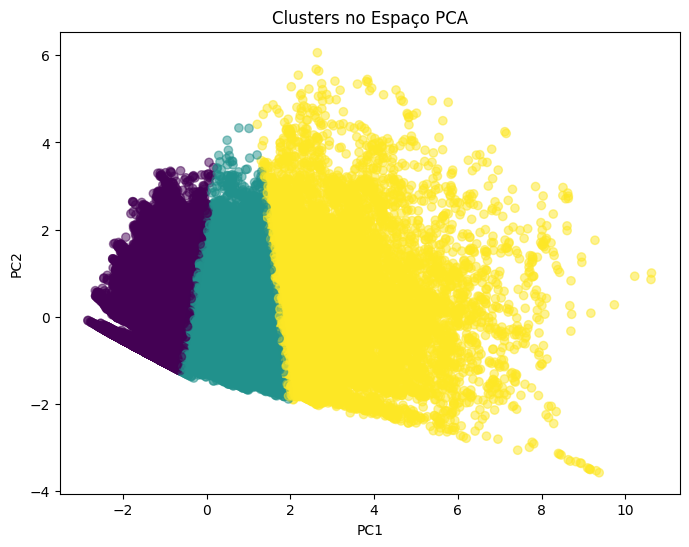

In [ ]:
from sklearn.cluster import KMeans

kmeans_q24 = KMeans(n_clusters=3, random_state=42)
clusters_q24 = kmeans_q24.fit_predict(X_pca_q24)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_q24[:,0], X_pca_q24[:,1], c=clusters_q24, cmap='viridis', alpha=0.5)
plt.title("Clusters no Espaço PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Pergunta: os grupos se separam de forma clara?**

A separação dos grupos é quase clara, o que permite identificar padrões distintos de consumo. A parte não separada claramente indica que não há uma divisão absolutamente nítida entre os grupos e que eles estão ligados em certos pontos

## Ex 25

In [ ]:
df_q25 = df.copy()

In [ ]:
df_reg_q25 = df_q25[['Voltage', 'Global_active_power']].copy()

df_reg_q25['Voltage'] = pd.to_numeric(df_reg_q25['Voltage'], errors='coerce')
df_reg_q25['Global_active_power'] = pd.to_numeric(df_reg_q25['Global_active_power'], errors='coerce')

df_reg_q25.dropna(inplace=True)

X_q25 = df_reg_q25[['Voltage']]
y_q25 = df_reg_q25['Global_active_power']

In [ ]:
lin_reg_q25 = LinearRegression()
lin_reg_q25.fit(X_q25, y_q25)
y_pred_lin_q25 = lin_reg_q25.predict(X_q25)


poly_q25 = PolynomialFeatures(degree=2)
X_poly_q25 = poly_q25.fit_transform(X_q25)
poly_reg_q25 = LinearRegression()
poly_reg_q25.fit(X_poly_q25, y_q25)
y_pred_poly_q25 = poly_reg_q25.predict(X_poly_q25)

In [ ]:
rmse_lin_q25 = np.sqrt(mean_squared_error(y_q25, y_pred_lin_q25))
rmse_poly_q25 = np.sqrt(mean_squared_error(y_q25, y_pred_poly_q25))

print("RMSE Linear:", rmse_lin_q25)
print("RMSE Polinomial:", rmse_poly_q25)

RMSE Linear: 1.064619464191137
RMSE Polinomial: 1.0322104266937089


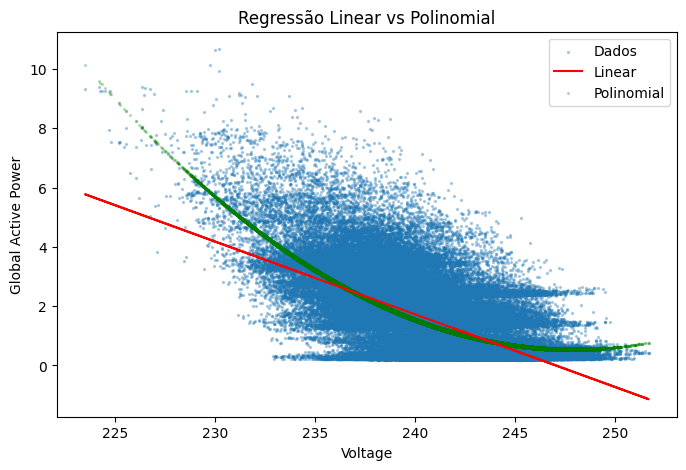

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_q25, y_q25, s=2, alpha=0.3, label="Dados")
plt.plot(X_q25, y_pred_lin_q25, color='red', label="Linear")
plt.scatter(X_q25, y_pred_poly_q25, color='green', s=2, alpha=0.2, label="Polinomial")
plt.legend()
plt.xlabel("Voltage")
plt.ylabel("Global Active Power")
plt.title("Regressão Linear vs Polinomial")
plt.show()

#**Parte 3**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df_2 = pd.read_csv('/content/sample_data/energydata_complete.csv', sep=',', low_memory=False)

In [ ]:
df_2_q26 = df_2.copy()
df_2_q27 = df_2.copy()
df_2_q28 = df_2.copy()
df_2_q29 = df_2.copy()
df_2_q30 = df_2.copy()
df_2_q31 = df_2.copy()
df_2_q32 = df_2.copy()
df_2_q33 = df_2.copy()
df_2_q34 = df_2.copy()
df_2_q35 = df_2.copy()

#Ex 26

In [ ]:
df_2_q26.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df_2_q26.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


#Ex 27

<Axes: >

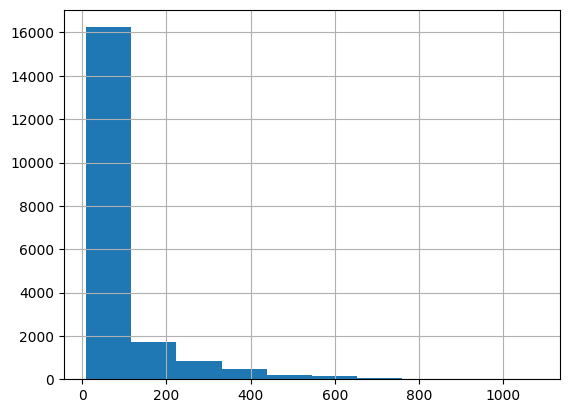

In [ ]:
df_2_q27['Appliances'].hist()

#Ex 28

In [ ]:
correlations_2_q28 = df_2_q28.drop('date', axis=1).corr()['Appliances'].sort_values(ascending=False)
print(correlations_2_q28)

# Os fatores que tem mais relação com o consumo é: Lights, T2 e T6

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


#Ex 29

In [ ]:
numeric_cols_2_q29 = df_2_q29.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
scaler_2_q29 = MinMaxScaler()
numeric_cols_2_q29 = df_2_q29.select_dtypes(include=['float64','int64']).columns
df_2_q29[numeric_cols_2_q29] = scaler_2_q29.fit_transform(df_2_q29[numeric_cols_2_q29])

In [ ]:
print(df_2_q29.head())

                  date  Appliances    lights       T1      RH_1        T2  \
0  2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
1  2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2  2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
3  2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
4  2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

       RH_2        T3      RH_3        T4  ...        T9      RH_9     T_out  \
0  0.684038  0.215188  0.746066  0.351351  ...  0.223032  0.677290  0.372990   
1  0.682140  0.215188  0.748871  0.351351  ...  0.226500  0.678532  0.369239   
2  0.679445  0.215188  0.755569  0.344745  ...  0.219563  0.676049  0.365488   
3  0.678414  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.361736   
4  0.676727  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoi

In [ ]:
df_2_q29.to_csv("/content/sample_data/energydata_scaled.csv", index=False)

#Ex 30

In [ ]:
df_2_q30_scaled = pd.read_csv("/content/sample_data/energydata_scaled.csv")

In [ ]:
numeric_cols_2_q30 = df_2_q30_scaled.select_dtypes(include=['float64', 'int64']).columns
X_2_q30 = df_2_q30[numeric_cols_2_q30]
X_2_q30 = df_2_q30[numeric_cols_2_q30]

In [ ]:
pca_2_q30 = PCA(n_components=2)
X_pca_2_q30 = pca_2_q30.fit_transform(X_2_q30)

In [ ]:
df_2_q30_pca = pd.DataFrame(X_pca_2_q30, columns=['PC1','PC2'])

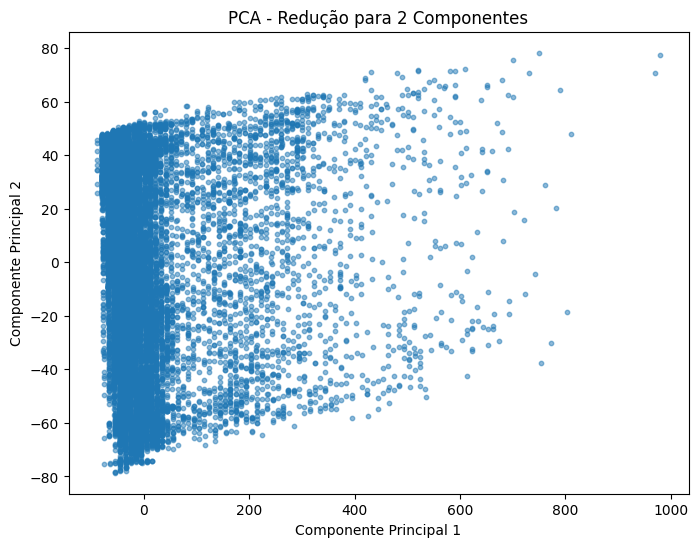

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_2_q30_pca['PC1'], df_2_q30_pca['PC2'], alpha=0.5, s=10)
plt.title("PCA - Redução para 2 Componentes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

Não, olhando o gráfico, os pontos ficam todos juntos e misturados. Não conseguimos ver grupos separados. Eles formam uma mancha só, sem divisões claras.

#Ex 31

In [ ]:
df_sample_2_q31 = df_2.sample(n=5000, random_state=42)

In [ ]:
env_cols_2_q31 = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']
X_2_q31 = df_2_q31[env_cols_2_q31]
y_2_q31 = df_2_q31['Appliances']

In [ ]:
X_train_2_q31, X_test_2_q31, y_train_2_q31, y_test_2_q31 = train_test_split(X_2_q31, y_2_q31, test_size=0.2, random_state=42)

In [ ]:
lin_model_2_q31 = LinearRegression()
lin_model_2_q31.fit(X_train_2_q31, y_train_2_q31)

LinearRegression()

In [ ]:
y_pred_2_q31 = lin_model_2_q31.predict(X_test_2_q31)

In [ ]:
r2 = r2_score(y_test_2_q31, y_pred_2_q31)
rmse_2_q31 = mean_squared_error(y_test_2_q31, y_pred_2_q31)**0.5
mse_2_q31 = mean_squared_error(y_test_2_q31, y_pred_2_q31)

In [ ]:
print(f"R²: {r2_2_q31:.4f}")
print(f"Erro médio quadrático (MSE): {mse_2_q31:.4f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse_2_q31:.4f}")

R²: 0.1459
Erro médio quadrático (MSE): 8547.0249
Raiz do erro quadrático médio (RMSE): 92.4501


#Ex 32

In [ ]:
env_cols_2_q32 = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']
X_2_q32 = df_2_q32[env_cols_2_q32]
y_2_q32 = df_2_q32['Appliances']

In [ ]:
X_train_2_q32, X_test_2_q32, y_train_2_q32, y_test_2_q32 = train_test_split(X_2_q32, y_2_q32, test_size=0.2, random_state=42)

In [ ]:
rf_model_2_q32 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2_q32.fit(X_train_2_q32, y_train_2_q32)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf_2_q32 = rf_model_2_q32.predict(X_test_2_q32)

In [ ]:
r2_rf = r2_score(y_test_2_q32, y_pred_rf_2_q32)

In [ ]:
rmse_rf_2_q32 = mean_squared_error(y_test_2_q32, y_pred_rf_2_q32)**0.5

In [ ]:
print(f"RMSE: {rmse_rf_2_q32:.4f}")

RMSE: 63.1388


O Random Forest teve RMSE menor que a Regressão Linear, mostrando que captura melhor relações não lineares do consumo. Assim, ele se mostrou mais preciso na previsão de Appliances.

#Ex 33

In [ ]:
cols_cluster_2_q33 = ['Appliances','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5']

X_cluster_2_q33 = df_2_q33[cols_cluster_2_q33]

In [ ]:
for k in [3,4,5]:
    kmeans_2_q33 = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_2_q33[f'cluster_{k}'] = kmeans_2_q33.fit_predict(X_cluster_2_q33)

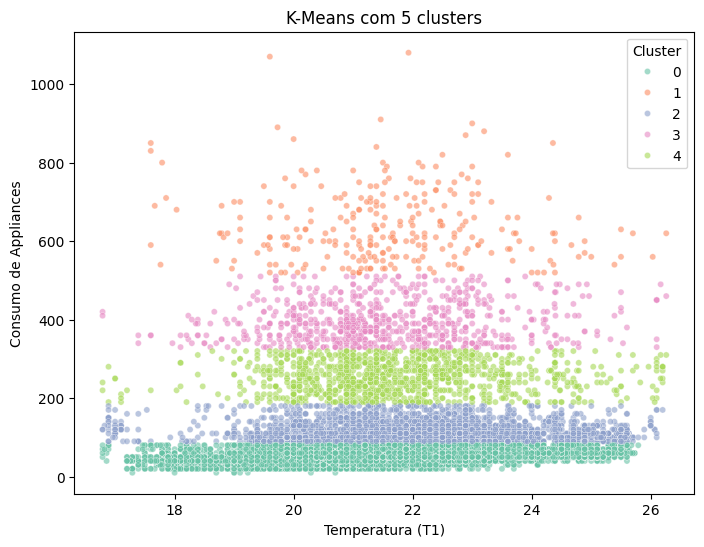

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='T1', y='Appliances', hue=f'cluster_{k}', data=df_2_q33, palette='Set2', s=20, alpha=0.6)
plt.title(f"K-Means com {k} clusters")
plt.xlabel("Temperatura (T1)")
plt.ylabel("Consumo de Appliances")
plt.legend(title="Cluster")
plt.show()

In [ ]:
print(f"Média de consumo por cluster (k={k}):")
print(df_2_q33.groupby(f'cluster_{k}')['Appliances'].mean())

Média de consumo por cluster (k=5):
cluster_5
0     54.061737
1    641.152416
2    111.956313
3    395.696721
4    254.164306
Name: Appliances, dtype: float64


Cada cluster mostra um perfil de consumo distinto, e olhando a média de Appliances e algumas variáveis ambientais, conseguimos entender quais casas consomem mais ou menos energia e em que condições.

#Ex 34

In [ ]:
median_appliances_2_q34 = df_2_q34['Appliances'].median()
df_2_q34['high_consumption'] = (df_2_q34['Appliances'] > median_appliances_2_q34).astype(int)

In [ ]:
env_cols_2_q34 = ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']

In [ ]:
X_2_q34 = df_2_q34[env_cols_2_q34]
y_2_q34 = df_2_q34['high_consumption']

In [ ]:
X_train_2_q34, X_test_2_q34, y_train_2_q34, y_test_2_q34 = train_test_split(X_2_q34, y_2_q34, test_size=0.2, random_state=42)

In [ ]:
log_model_2_q34 = LogisticRegression(max_iter=1000)
log_model_2_q34.fit(X_train_2_q34, y_train_2_q34)
y_pred_log_2_q34 = log_model_2_q34.predict(X_test_2_q34)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Logistic Regression:")
print("Acurácia:", round(accuracy_score(y_test_2_q34, y_pred_log_2_q34), 4))
print(classification_report(y_test_2_q34, y_pred_log_2_q34))

Logistic Regression:
Acurácia: 0.756
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2127
           1       0.75      0.71      0.73      1820

    accuracy                           0.76      3947
   macro avg       0.75      0.75      0.75      3947
weighted avg       0.76      0.76      0.76      3947



In [ ]:
rf_model_2_q34 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2_q34.fit(X_train_2_q34, y_train_2_q34)
y_pred_rf_2_q34 = rf_model_2_q34.predict(X_test_2_q34)

In [ ]:
print("Random Forest Classifier:")
print("Acurácia:", round(accuracy_score(y_test_2_q34, y_pred_rf_2_q34), 4))
print(classification_report(y_test_2_q34, y_pred_rf_2_q34))

Random Forest Classifier:
Acurácia: 0.8994
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2127
           1       0.90      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.90      0.90      3947
weighted avg       0.90      0.90      0.90      3947



#Ex 35

In [ ]:
def avaliar_modelo(nome, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{nome} - Métricas de Classificação")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo','Alto'], yticklabels=['Baixo','Alto'])
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()


Logistic Regression - Métricas de Classificação
Accuracy : 0.7560
Precision: 0.7464
Recall   : 0.7132
F1-score : 0.7294


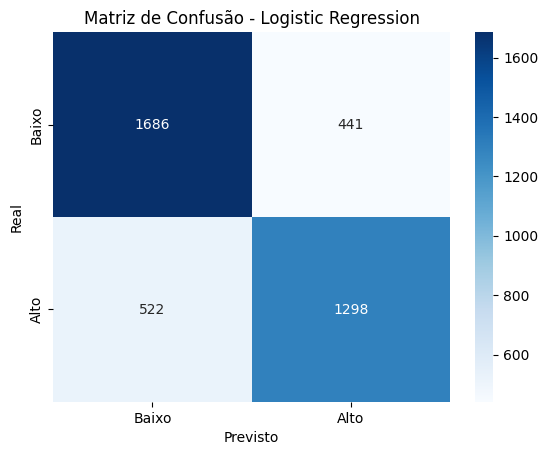


Random Forest - Métricas de Classificação
Accuracy : 0.8994
Precision: 0.8999
Recall   : 0.8797
F1-score : 0.8897


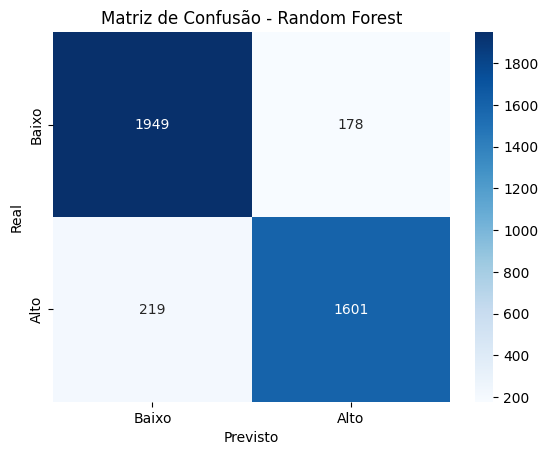

In [ ]:
avaliar_modelo("Logistic Regression", y_test_2_q34, y_pred_log_2_q34)
avaliar_modelo("Random Forest", y_test_2_q34, y_pred_rf_2_q34)

O modelo erra mais para alto consumo, porque confunde mais valores altos como baixos do que o contrário.